In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import networkx as nx
import os
import pandas as pd
import time
import json

In [4]:
path = "../outputs"
f = "path_21946_infos.json"

In [17]:
with open(os.path.join(path,f),"r") as infile:
    infos = json.load(infile)

[4, 80]
[ 0.71646506  0.2549266  26.1549266  22.47044384]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}
[2, 50]
[ 0.69723429  0.2549266  22.9649266  19.35837487]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}
[1, 0]
[ 0.63954198  0.2549266  21.1449266  17.99630591]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}


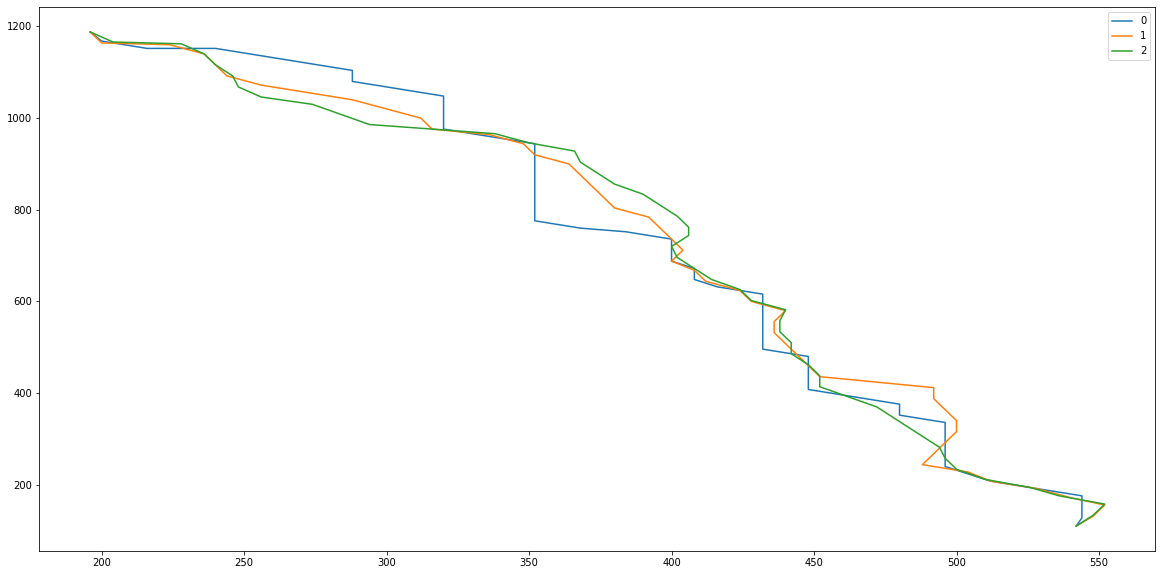

In [22]:
plt.figure(figsize=(20,10))
for i in range(len(infos["pipeline"])):
    print(infos["pipeline"][i])
    costs = np.array(infos["data"][i]["edgecosts"])
    path = np.array(infos["data"][i]["path_cells"])
    plt.plot(path[:,0], path[:,1], label=i)
    print(np.sum(costs, axis=0))
    print(infos["data"][i]["time_logs"])
plt.legend()
plt.show()

In [2]:
path = "../outputs"

In [27]:
times = pd.read_csv(os.path.join(path, "watershed_comp/time_tests.csv")) # "time_tests_compare1.csv"))

## Scale 2 comparison

In [18]:
direct = times[times["id"].str.contains("direct")]

In [19]:
overall_times = times[times["time_pipeline"]!=0]

In [8]:
# out_costs = np.array([eval(c) for c in times["cost_sum"]])

In [9]:
times.columns

Index(['id', 'scale', 'graphtype', 'pipeline', 'n_nodes', 'n_edges',
       'add_nodes_time', 'add_edge_time', 'shortest_path_time', 'sp_tree_time',
       'ksp_time', 'pareto_time', 'downsample_time', 'cult_costs', 'hum_costs',
       'plan_costs', 'tech_costs', 'cost_sum', 'time_pipeline'],
      dtype='object')

In [30]:
agg_dict = {"n_edges":"max", "add_edge_time":"sum", "shortest_path_time":"sum","downsample_time":"sum", "cost_sum":"min", "time_pipeline":"max"}
#  "pareto_time":"sum", "ksp_time":"sum", "sp_tree_time":"sum",
max_edges = times.groupby("id").agg(agg_dict).reset_index()

In [32]:
# times.groupby('id')['dist'].apply(list)
max_edges["cost_sum"] = list(times.groupby('id')['cost_sum'].apply(list))
# max_edges["factos"] = list(times.groupby('id')['sample_factor'].apply(list))

In [35]:
4280*5656

24207680

In [36]:
1300 * 2500

3250000

In [33]:
max_edges

,id,n_edges,add_edge_time,shortest_path_time,downsample_time,cost_sum,time_pipeline
0,2-100-max,96237808,145.023,103.605,5.687,"[7.302045490842018, 6.56529672236911]",339.687
1,2-100-max-watershed,96926596,146.391,99.079,315.066,"[7.047956820891278, 6.56529672236911]",644.073
2,2-100-mean,97054407,154.193,104.702,7.411,"[7.187759776556303, 6.56529672236911]",356.233
3,2-100-mean-watershed,96926596,151.603,102.710,339.554,"[7.047956820891278, 6.56529672236911]",681.858
4,2-100-min,96518677,148.182,105.222,6.281,"[7.591602141088321, 6.56529672236911]",350.998
5,2-100-min-watershed,96926596,147.079,99.575,330.422,"[7.047956820891278, 6.56529672236911]",661.965
6,4-100-mean,98546071,112.830,72.964,1.732,"[7.819794638246336, 6.56529672236911]",234.942
7,4-100-mean-watershed,97285353,113.496,70.916,80.785,"[7.707956820891278, 6.56529672236911]",309.964


In [22]:
df_plot = times[["id", "cost_sum", ]]

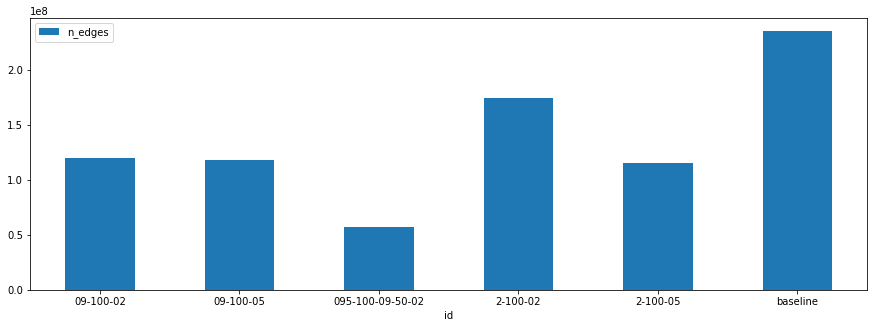

In [23]:
ax = max_edges.plot.bar(x='id', y='n_edges', rot=0, figsize=(15,5))


## Bar plot of costs

In [24]:
def plot_comparison(var):
    costs = times.groupby('id')[var].apply(list)
    co = np.array(costs)
    max_len = max([len(c) for c in co])
    new_list = [l + [l[-1] for _ in range(max_len-len(l))] for l in co]
    new_df = pd.DataFrame(data = new_list, columns=[str(i) for i in range(max_len)])
    new_df["id"] = np.unique(times["id"])
    ax = new_df.plot.bar(x='id', figsize=(15,5))

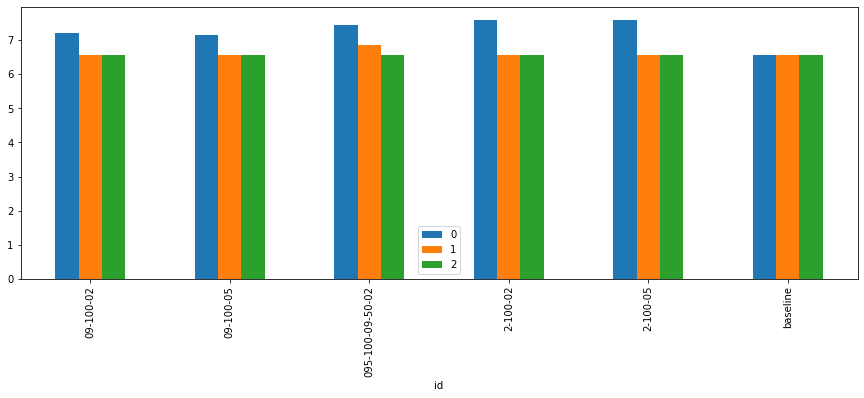

In [25]:
plot_comparison("cost_sum")

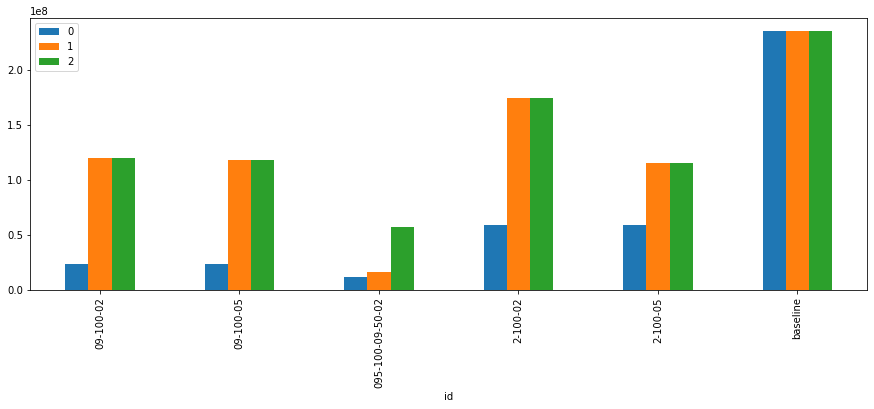

In [26]:
plot_comparison("n_edges")

## Check outputs qualitatively:

In [ ]:
instance_path = "/Users/ninawiedemann/Downloads/tifs_new/data_dump_1.dat"
with open(instance_path, "rb") as infile:
    data = pickle.load(infile)
(instance, instance_corr, start_inds, dest_inds) = data.data

In [ ]:
paths = []
for json_file in ["path_norm-1-direct_infos.json", "path_norm_1_pipe_infos.json", "path_random_1_pipe_infos.json"]:
    with open("../outputs/"+json_file, "r") as infile:
        infos = json.load(infile)
        print(json_file)
        costs = infos["data"][-1]["edgecosts"]
        print(np.sum(np.array(costs), axis=0), np.sum(np.array(costs)))
        paths.append(np.array(infos["data"][-1]["path_cells"]))

### Double check costs

In [ ]:
for i, path in enumerate(paths):
    costs = []
    for p in path:
        cost = instance[:, p[0], p[1]]
        costs.append(cost)
    print(np.sum(np.array(costs), axis=0))

### Color paths in image

In [ ]:
expanded = np.expand_dims(instance_corr*instance[2], axis=2)
expanded = np.tile(expanded, (1, 1, 3)) 
buffer = 2
for i, path in enumerate(paths[:3]):
    col = np.zeros(3)
    col[i] = 1
    for p in path:
        x = p[0]
        y = p[1]
        expanded[x - buffer:x + buffer + 1,
                 y - buffer:y + buffer + 1]  = col

In [ ]:
red = normal

green = norm pipe

blue = random pipe

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(np.swapaxes(expanded, 1, 0))

### Time tests

In [ ]:
# min and argmin at same time
def original_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.amin(A,axis=0)
    return min_idx, min_val

def proposed_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.take_along_axis(A, min_idx[None,:,:], axis=0)[0,:,:]
    return min_idx, min_val


A = np.random.randint(0,99,(40,400,500))
%timeit original_app(A)
%timeit proposed_app(A)

## Check average distance on out path

2
23.44796037531516 min: 16.1245154965971
2
23.88907334236418 min: 16.492422502470642


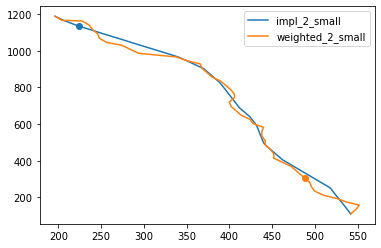

In [19]:
path_in = "../../outputs"
found_paths = []
for f in ["impl_2_small", "weighted_2_small"]:
    with open(os.path.join(path_in,f+"_infos.json"),"r") as infile:
        infos = json.load(infile)
    # print(infos["data"][0]["path_cells"])
    print(infos["scale"])
    found_paths.append(infos["data"][0]["path_cells"])
    # get path
    path = np.asarray(infos["data"][0]["path_cells"])
    # plot
    plt.plot(path[:,0], path[:,1], label=f)
    # get dists
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    print(np.mean(dists), "min:", np.min(dists))
    a = np.where(np.array(dists)<17)
    plt.scatter(path[a,0], path[a,1])
plt.legend()
plt.show()

smaller 17: (array([46]),)


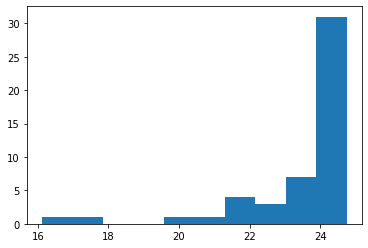

smaller 17: (array([9]),)


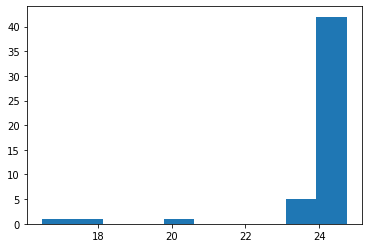

In [17]:
for path in found_paths:
    path = np.asarray(path)
    # plt.plot(path[:,0], path[:,1])
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    # print(dists)
    print("smaller 17:", np.where(np.array(dists)<17))
    plt.hist(dists)
    plt.show()

## Compare different graph outputs

In [2]:
# utils imports
from power_planner.data_reader import DataReader
from power_planner import graphs
from power_planner.plotting import plot_path_costs, plot_pipeline_paths, plot_path, plot_k_sp
from power_planner.utils.utils import get_distance_surface, time_test_csv, compute_pylon_dists, angle
from power_planner.utils.utils import get_half_donut
from types import SimpleNamespace
import pickle

In [3]:
PATH_FILES = "../data"

# DEFINE CONFIGURATION
ID = "w_ksp_5"  # str(round(time.time() / 60))[-5:]

OUT_PATH = "outputs/path_" + ID
SCALE_PARAM = 5  # args.scale
# normal graph pipeline
# PIPELINE = [(2, 50), (1, 0)]  # [(1, 0)]  # [(4, 80), (2, 50), (1, 0)]  #
# random graph pipeline
PIPELINE = [(1, 0)]  # [(0.9, 40), (0, 0)]

# LineGraph, WeightedGraph, RandomWeightedGraph, RandomLineGraph, PowerBF
# TwoPowerBF, WeightedKSP
# summarize: mean/max/min, remove: all/surrounding, sample: simple/watershed
NOTES = "None"  # "mean-all-simple"

IOPATH = os.path.join(PATH_FILES, "data_dump_" + str(SCALE_PARAM) + ".dat")

with open("../config.json", "r") as infile:
    cfg_dict = json.load(infile)  # Config(SCALE_PARAM)
    cfg = SimpleNamespace(**cfg_dict)
    cfg.PYLON_DIST_MIN, cfg.PYLON_DIST_MAX = compute_pylon_dists(
        cfg.PYLON_DIST_MIN, cfg.PYLON_DIST_MAX, cfg.RASTER, SCALE_PARAM
    )

defined pylon distances in raster: 3.0 5.0


In [4]:
cfg.MAX_ANGLE_LG = 1.3

In [5]:
# READ DATA
with open(IOPATH, "rb") as infile:
    data = pickle.load(infile)
    (instance, instance_corr, start_inds, dest_inds) = data.data

In [6]:
def build_graph(graph, max_angle_lg=np.pi / 4, ang_weight=0.25):
    graph.set_shift(
        3,
        5,
        dest_inds - start_inds,
        np.pi / 4,
        max_angle_lg=max_angle_lg
    )
    corridor = np.ones(instance_corr.shape) * 0.5 
    graph.set_corridor(
        corridor, start_inds, dest_inds, factor_or_n_edges=1
    )
    graph.set_edge_costs(data.layer_classes, data.class_weights, ang_weight)
    graph.add_nodes()
    graph.add_edges()
    return graph

In [7]:
impl_lg = graphs.ImplicitKSP(
    instance, instance_corr, verbose=0
)
impl_lg = build_graph(
    impl_lg, max_angle_lg=cfg.MAX_ANGLE_LG, ang_weight=0.1
)
path, path_costs, cost_sum = impl_lg.get_shortest_path(
    start_inds, dest_inds
)

In [140]:
from numba.typed import List
from numba import jit

In [150]:
@jit(nopython=True)
def get_sp_start_shift(
    dists, dists_argmin, start_inds, dest_inds, shifts, min_shift
):
    if not np.any(dists[:, dest_inds[0], dest_inds[1]] < np.inf):
        raise RuntimeWarning("empty path")
    min_shift = dists_argmin[int(min_shift), dest_inds[0], dest_inds[1]]
    curr_point = np.asarray(dest_inds)
    my_path = List()
    tmp_list_inner = List()
    tmp_list_inner.append(dest_inds[0])
    tmp_list_inner.append(dest_inds[1])
    my_path.append(tmp_list_inner)
    # min_shift = np.argmin(dists[:, dest_inds[0], dest_inds[1]])
    while np.any(curr_point - start_inds):
        new_point = curr_point - shifts[int(min_shift)]
        min_shift = dists_argmin[int(min_shift), curr_point[0], curr_point[1]
                                 ]
        my_path.append(List(new_point))
        curr_point = new_point
    return my_path

In [152]:
d_ba_arg = np.argmin(
            impl_lg.dists[:, dest_inds[0], dest_inds[1]]
        )
l = get_sp_start_shift(impl_lg.dists, impl_lg.preds, start_inds, dest_inds, np.asarray(impl_lg.shifts), d_ba_arg)

In [8]:
cost_sum

7.446781122651258

In [11]:
cost_sum - np.min(impl_lg.dists[:, dest_inds[0], dest_inds[1]])

0.0031812754158737633

In [10]:
impl_lg.get_shortest_path_tree(start_inds, dest_inds)

In [100]:
wg_graph = graphs.WeightedGraph(
    instance, instance_corr, verbose=0
)
wg_graph = build_graph(wg_graph, max_angle_lg=cfg.MAX_ANGLE_LG)
wg_graph.sum_costs()
source_v, target_v = wg_graph.add_start_and_dest(
    start_inds, dest_inds
)
path_wg, path_costs_wg, cost_sum_wg = wg_graph.get_shortest_path(
    source_v, target_v
)

In [101]:
cost_sum_wg

7.666136461138437

In [102]:
for p in range(len(path_wg)):
    i,j = path_wg[p]
    print(i,j, path[p])
    print(i == path[p][0] and j==path[p][1])
    print(sorted(impl_lg.dists[:, i,j]))

108 22 [108, 22]
True
[0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182, 0.15990541871921182]
110 26 [110, 26]
True
[0.3147822660098522, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
110 31 [110, 31]
True
[0.45282758620689656, 0.4756847290640394, 0.5953615763546798, 0.6168472906403941, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
108 35 [108, 35]
True
[0.5890443349753695, 0.6095330049261083, 0.6222581280788178, 0.6461044334975369, 0.6470187192118226, 0.6502187192118226, 0.6515901477832512, 0.7126896551724138, 0.7215566502463054, 0.7335172413793103, 0.7481576354679803, 0.7527133004926108, 0.7542068965517241, 0.7622068965517241]
105 39 [105, 39]
True
[0.7132532019704434, 0.7302857142857142, 0.7665733990147783, 0.7748847290640393, 0.7757990147783

In [103]:
p2, pc2, cs2 = impl_lg.transform_path(path_wg)

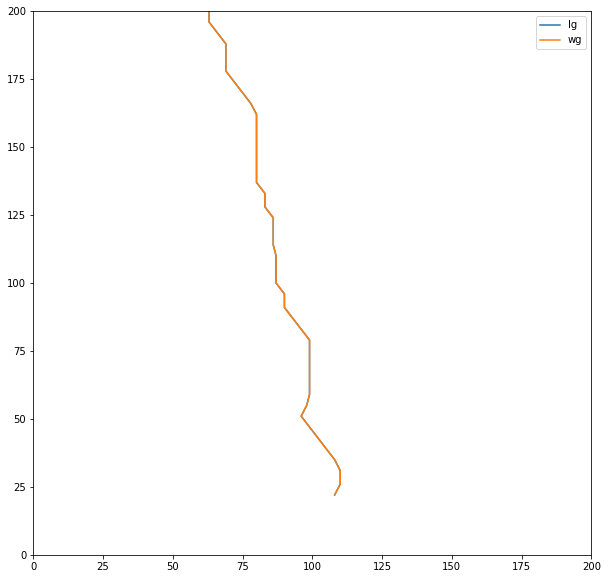

In [104]:
plt.figure(figsize=(10,10))
path = np.array(path)
path_wg = np.array(path_wg)
plt.plot(path[:,0], path[:,1], label="lg")
plt.plot(path_wg[:,0], path_wg[:,1], label="wg")
plt.xlim(0,200)
plt.ylim(0,200)
plt.legend()

In [54]:
98-96, 55-51

(2, 4)

In [80]:
angle(vec, [2,4])

0.7728465213278807

In [81]:
np.pi/4

0.7853981633974483

In [90]:
wg_graph.shifts

[(-4, 3),
 (-3, 2),
 (-3, 3),
 (-3, 4),
 (-2, 3),
 (-2, 4),
 (-1, 3),
 (-1, 4),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 3),
 (1, 4),
 (2, 4)]

In [91]:
angle((-4, 3), (2,4))

1.3909428270024184